In [24]:
from numpy import mean, std
import seaborn as sns
from matplotlib import *
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [25]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [26]:
train_data.columns = train_data.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
test_data.columns = test_data.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [27]:
train_data.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [28]:
print('Train Data Shape: ', train_data.shape)
print('Test Data Shape: ', test_data.shape)
train_data.head()

Train Data Shape:  (318438, 18)
Test Data Shape:  (137057, 17)


,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [29]:
train_data.dtypes

case_id                                int64
hospital_code                          int64
hospital_type_code                    object
city_code_hospital                     int64
hospital_region_code                  object
available_extra_rooms_in_hospital      int64
department                            object
ward_type                             object
ward_facility_code                    object
bed_grade                            float64
patientid                              int64
city_code_patient                    float64
type_of_admission                     object
severity_of_illness                   object
visitors_with_patient                  int64
age                                   object
admission_deposit                    float64
stay                                  object
dtype: object

In [30]:
train_data.isnull().sum()

case_id                                 0
hospital_code                           0
hospital_type_code                      0
city_code_hospital                      0
hospital_region_code                    0
available_extra_rooms_in_hospital       0
department                              0
ward_type                               0
ward_facility_code                      0
bed_grade                             113
patientid                               0
city_code_patient                    4532
type_of_admission                       0
severity_of_illness                     0
visitors_with_patient                   0
age                                     0
admission_deposit                       0
stay                                    0
dtype: int64

In [31]:
train_data.nunique()

case_id                              318438
hospital_code                            32
hospital_type_code                        7
city_code_hospital                       11
hospital_region_code                      3
available_extra_rooms_in_hospital        18
department                                5
ward_type                                 6
ward_facility_code                        6
bed_grade                                 4
patientid                             92017
city_code_patient                        37
type_of_admission                         3
severity_of_illness                       3
visitors_with_patient                    28
age                                      10
admission_deposit                      7300
stay                                     11
dtype: int64

In [32]:
train_data.columns

Index(['case_id', 'hospital_code', 'hospital_type_code', 'city_code_hospital',
       'hospital_region_code', 'available_extra_rooms_in_hospital',
       'department', 'ward_type', 'ward_facility_code', 'bed_grade',
       'patientid', 'city_code_patient', 'type_of_admission',
       'severity_of_illness', 'visitors_with_patient', 'age',
       'admission_deposit', 'stay'],
      dtype='object')

In [33]:
# Unique values for all the columns
for col in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'admission_deposit']))].tolist():
    print(" Unique Values --> " + col, ':', len(train_data[col].unique()), ': ', train_data[col].unique())

 Unique Values --> hospital_code : 32 :  [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
 Unique Values --> hospital_type_code : 7 :  ['c' 'e' 'b' 'a' 'f' 'd' 'g']
 Unique Values --> city_code_hospital : 11 :  [ 3  5  1  2  6  9 10  4 11  7 13]
 Unique Values --> hospital_region_code : 3 :  ['Z' 'X' 'Y']
 Unique Values --> available_extra_rooms_in_hospital : 18 :  [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
 Unique Values --> department : 5 :  ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
 Unique Values --> ward_type : 6 :  ['R' 'S' 'Q' 'P' 'T' 'U']
 Unique Values --> ward_facility_code : 6 :  ['F' 'E' 'D' 'B' 'A' 'C']
 Unique Values --> bed_grade : 5 :  [ 2.  3.  4.  1. nan]
 Unique Values --> city_code_patient : 38 :  [ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35.
 36. 38.]
 Unique Values --> type

## Exploratory Data Analysis

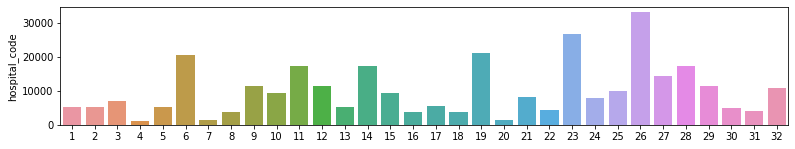

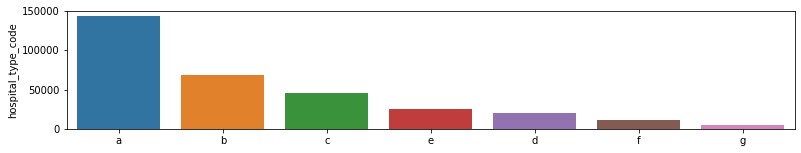

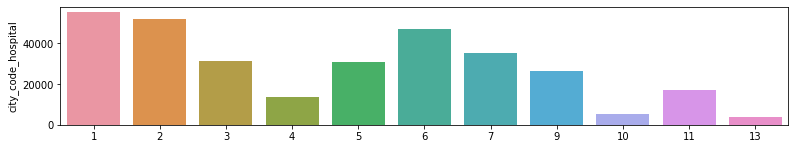

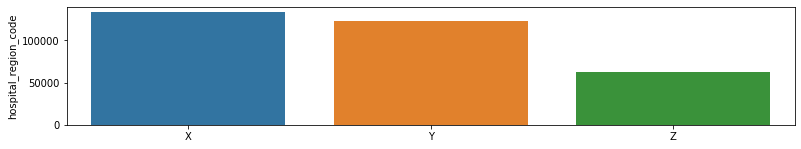

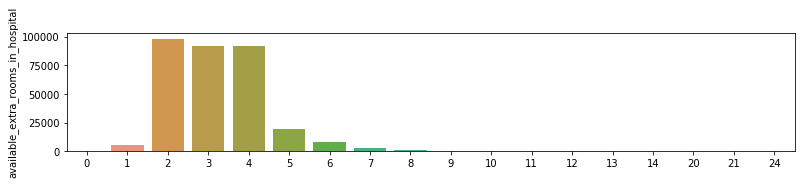

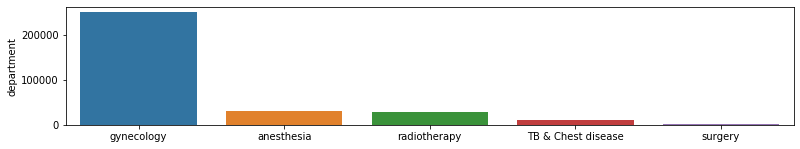

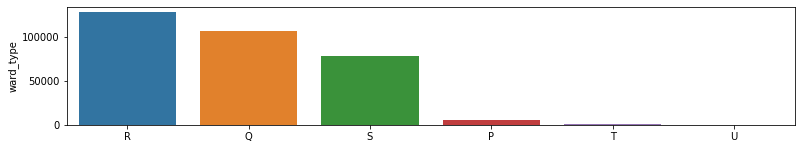

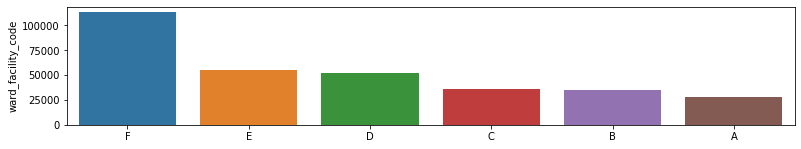

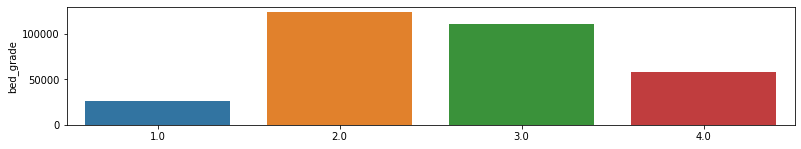

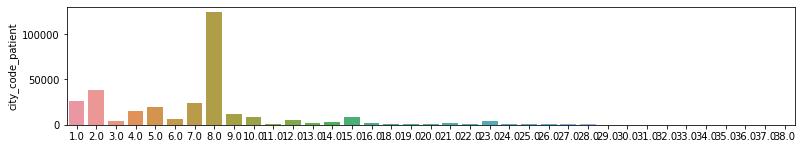

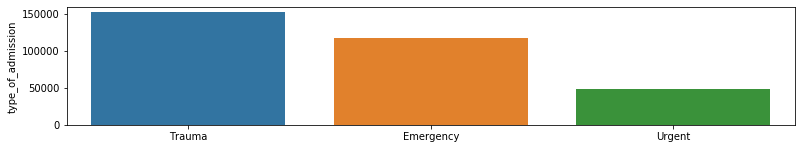

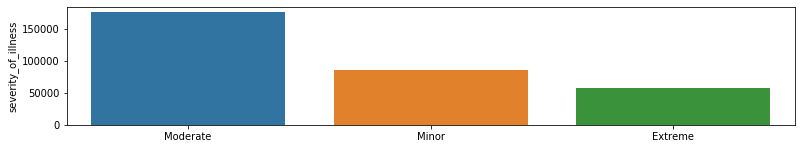

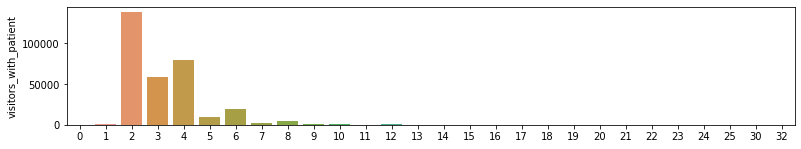

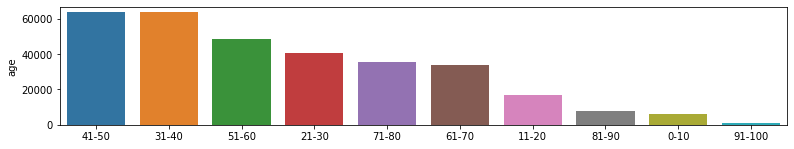

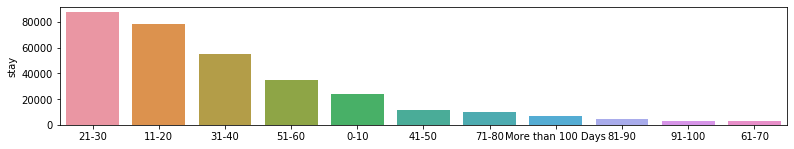

In [34]:
i = 1
for column in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'admission_deposit']))].tolist():
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    sns.barplot(x = train_data[column].value_counts().index, y = train_data[column].value_counts())
    i += 1
    plt.show()

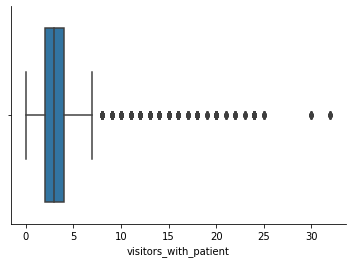

In [35]:
sns.boxplot(x = 'visitors_with_patient', data = train_data)
sns.despine()

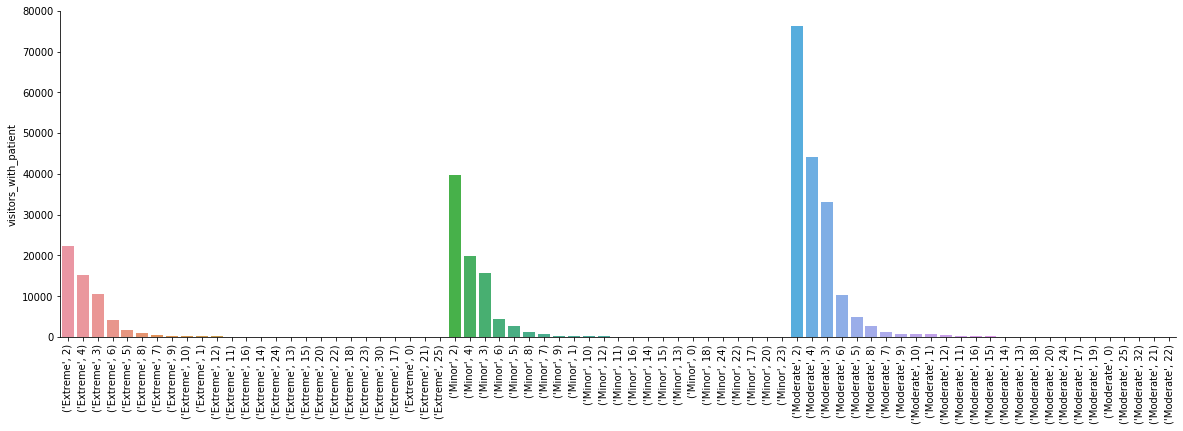

In [36]:
plt.figure(figsize = (20, 6))
sns.barplot(x = train_data.groupby(['severity_of_illness'])['visitors_with_patient'].value_counts().index, y = train_data.groupby(['severity_of_illness'])['visitors_with_patient'].value_counts())
plt.xticks(rotation = 90)
sns.despine()

In [37]:
train_data = train_data.fillna('NaN')
test_data = test_data.fillna('NaN')

for column in train_data.columns[~(train_data.columns.isin(['case_id', 'stay']))].tolist():

    le = LabelEncoder()

    if column == 'city_code_patient':
        train_data['city_code_patient'] = train_data['city_code_patient'].astype('str')
        test_data['city_code_patient'] = test_data['city_code_patient'].astype('str')
        train_data['city_code_patient'] = le.fit_transform(train_data['city_code_patient'])
        test_data['city_code_patient'] = le.fit_transform(test_data['city_code_patient'])
    
    elif column == 'bed_grade':
        bedGrade = {1: '1',2: '2', 3: '3', 4: '4', np.nan: '5'}
        train_data['bed_grade'] = train_data['bed_grade'].map(bedGrade)
        test_data['bed_grade'] = test_data['bed_grade'].map(bedGrade)
        train_data['bed_grade'] = train_data['bed_grade'].fillna('NaN')
        test_data['bed_grade'] = test_data['bed_grade'].fillna('NaN')
    
    else:
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.fit_transform(test_data[column])

In [38]:
train_data.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,7,2,2,2,3,3,2,5,2,21972,34,0,0,2,5,2954,0-10
1,2,1,2,4,2,2,3,3,5,2,21972,34,1,0,2,5,3997,41-50
2,3,9,4,0,0,2,1,3,4,2,21972,34,1,0,2,5,2788,31-40
3,4,25,1,1,1,2,3,2,3,2,21972,34,1,0,2,5,5315,41-50
4,5,25,1,1,1,2,3,3,3,2,21972,34,1,0,2,5,3601,41-50


In [39]:
train_data.shape

(318438, 18)

In [40]:
ss = StandardScaler()

for column in train_data.columns[~(train_data.columns.isin(['case_id', 'stay']))].tolist():
    train_data[[column]] = ss.fit_transform(train_data[[column]])
    test_data[[column]] = ss.fit_transform(test_data[[column]])

In [41]:
train_data.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,-1.195176,0.483919,-0.568676,1.623734,-0.169283,1.881928,0.138476,1.014833,-0.716728,-0.905964,0.69064,-1.136165,-1.788287,-0.729304,0.4616,0.030478,0-10
1,2,-1.890124,0.483919,0.143906,1.623734,-1.026297,1.881928,1.381246,1.014833,-0.716728,-0.905964,0.69064,0.315306,-1.788287,-0.729304,0.4616,0.999811,41-50
2,3,-0.963527,1.786248,-1.281258,-1.033982,-1.026297,-1.681582,1.381246,0.422433,-0.716728,-0.905964,0.69064,0.315306,-1.788287,-0.729304,0.4616,-0.123797,31-40
3,4,0.889668,-0.167246,-0.924967,0.294876,-1.026297,1.881928,0.138476,-0.169967,-0.716728,-0.905964,0.69064,0.315306,-1.788287,-0.729304,0.4616,2.224721,41-50
4,5,0.889668,-0.167246,-0.924967,0.294876,-1.026297,1.881928,1.381246,-0.169967,-0.716728,-0.905964,0.69064,0.315306,-1.788287,-0.729304,0.4616,0.631781,41-50


In [42]:
train_data.dropna(inplace=True)
X=train_data.drop(['stay','case_id'],axis=1).astype('float32')
y=train_data['stay']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier(random_state=1)

lgbc.fit(X_train, y_train)

y_pred_test = lgbc.predict(X_test)
y_prob_test = lgbc.predict_proba(X_test)[:,1]

y_pred_train = lgbc.predict(X_train)
y_prob_train = lgbc.predict_proba(X_train)[:,1]

print('Accuracy on Train Set: ', accuracy_score(y_train, y_pred_train))
print('Accuracy on Test Set: ', accuracy_score(y_test, y_pred_test))

Accuracy on Train Set:  0.4353018260803224
Accuracy on Test Set:  0.4222706234685543


In [45]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint

lgbc = lgb.LGBMClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,10),
          'max_depth' : sp_randint(2,10),
          'min_child_samples' : sp_randint(1,20),
          'num_leaves' : sp_randint(5,10)}

rand_search_lgbc = RandomizedSearchCV(lgbc, param_distributions=params, random_state=1, cv=3)

rand_search_lgbc.fit(X_train, y_train)

rand_search_lgbc.best_params_

{'max_depth': 8, 'min_child_samples': 19, 'n_estimators': 9, 'num_leaves': 7}

In [49]:
# Passing best parameter for the Hyperparameter Tuning
lgbc_ht = lgb.LGBMClassifier(**rand_search_lgbc.best_params_, random_state=1)

lgbc_ht.fit(X_train, y_train)

y_pred_test = lgbc_ht.predict(X_test)
y_prob_test = lgbc_ht.predict_proba(X_test)[:,1]

y_pred_train = lgbc_ht.predict(X_train)
y_prob_train = lgbc_ht.predict_proba(X_train)[:,1]

print('Accuracy on Train Set: ', accuracy_score(y_train, y_pred_train))
print('Accuracy on Test Set: ', accuracy_score(y_test, y_pred_test))

Accuracy on Train Set:  0.37267027783886153
Accuracy on Test Set:  0.3705627342981005


In [50]:
test_data = test_data.fillna(method='ffill')

In [54]:

predictions = lgbc.predict(test_data[test_data.columns[~(test_data.columns.isin(['case_id']))].tolist()].values)
submission = pd.DataFrame({'case_id': test_data['case_id'], 'Stay': predictions.ravel()})
submission.to_csv('av_healthcare_v1.csv', index = False)
submission.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
